In [1]:
from astropy.convolution import convolve, Gaussian2DKernel
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

backgroundcolour = "#171726"
foregroundcolour = "#FFF"

In [ ]:
skyimage = np.zeros((501,501))

star_radius = 2

centre = (np.array(skyimage.shape) / 2).astype(int)

# there exists some maximum radius (relative to kernel size) where stars *will* look square
stars = [
    {"xy": centre, "brightness": 1, "radius": 5},
    {"xy": (100,100), "brightness": .5, "radius": 2},
]

for star in stars:
    (x, y), brightness, radius = star['xy'], star['brightness'], star['radius']
    star_xrange = x + radius * np.array([-1, 1])
    star_yrange = y + radius * np.array([-1, 1])
    skyimage[star_yrange[0]:star_yrange[1]+1, star_xrange[0]:star_xrange[1]+1] = brightness

std_x, std_y = 10,1
kernel1 = Gaussian2DKernel(x_stddev=std_x, y_stddev=std_y)
kernel2 = Gaussian2DKernel(x_stddev=std_y, y_stddev=std_x)
# kernel = convolve(kernel1,kernel2)
kernel = kernel1 + kernel2
convolved_skyimage = convolve(skyimage, kernel)

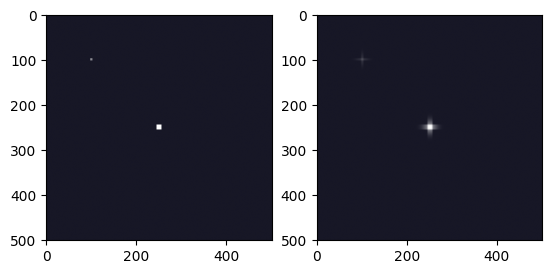

In [6]:
fig, ax = plt.subplots(ncols=2)
cmap = LinearSegmentedColormap.from_list("sky",[backgroundcolour, foregroundcolour])
ax[0].imshow(skyimage, cmap=cmap)
ax[1].imshow(convolved_skyimage, cmap=cmap)

plt.show()